# practice flattening and intution

In [23]:
salman=np.array([[1,2,3,4],
                [5,6,7,8]])
salman=salman.flatten()
salman

array([1, 2, 3, 4, 5, 6, 7, 8])

In [24]:
faizi=np.array([[1,2,3,4],
                [5,6,7,8]])
one=np.array([1,2,3,4])
two= np.array([5,6,7,8])
summ=np.concatenate((one,two))
summ

array([1, 2, 3, 4, 5, 6, 7, 8])

In [25]:
faizi[:,0]

array([1, 5])

# This code is working in functions and it's generalized to any hidden nodes with and without softmax fuction at output gives approximately same output

In [26]:
import numpy as np
def input_data(input_size,hidden_size,output_size):
    weights=np.matrix(np.random.rand(input_size,hidden_size))
    #print("weight matrix\n",weights)
    print("weight matrix shape",weights.shape)
    
    bias=np.zeros(hidden_size)
    bias2=np.zeros(output_size)
    print("bias matris",bias)
    print("bias2 matris",bias2)
    
    #print("shape of bias",bias.shape)
    H=0
    beta=0
    

    return weights,bias,H,beta,bias2



In [27]:
def sigmoid(X):
    return 1/(1+np.exp(-X))

In [28]:
def softmax(x):
    exps=np.exp(x-np.max(x,axis=1))
    return exps/np.sum(exps,axis=1)

In [29]:
def compute(X,y,weights,bias,H,beta):
    Psudo_inv_H=0
    X=np.matrix(X)
    print("X matrix shape ",X.shape)
    y=np.matrix(y)
    print("y matrix shape",y.shape)
    H=np.dot(X,weights)+bias
    print("ouput of h ",H)
    print("H matrix shape",H.shape)
    H=sigmoid(H)
    print("ouput of h after sigmoid function ",H)
    #calculating psudo inverse of H
    Psudo_inv_H=np.linalg.pinv(H)
    print("inverse matrix shape",Psudo_inv_H.shape)
    # calculate beta matrix
    #print("shape of y ",y.shape)
    beta=np.dot(Psudo_inv_H,y)
    print("beta matrix shape",beta.shape)
    
    return H,beta

def compute2(X,y,weights,bias,H,beta,bias2):
    Psudo_inv_H=0
    X=np.matrix(X)
    print("X matrix shape ",X.shape)
    y=np.matrix(y)
    print("y matrix shape",y.shape)
    print("bias",bias)
    H=np.dot(X,weights)+bias
    print("ouput of h ",H)
    print("H matrix shape",H.shape)
    H=sigmoid(H)
    print("shape of h after sigmoid",H.shape)
    print("ouput of h after sigmoid function ",H)
    #calculating psudo inverse of H
    Psudo_inv_H=np.linalg.pinv(H)
    print("inverse matrix shape",Psudo_inv_H.shape)
    # calculate beta matrix
    #print("shape of y ",y.shape)
    beta=np.dot(Psudo_inv_H,y)
    print("beta matrix shape",beta.shape)
    output=softmax((np.dot(H,beta))+bias2)
    
    return H,beta,output


In [30]:

def predict(H,beta,x_test):
    print(beta)
    #x_test=np.matrix(x_test)
    #print("x_test shape",x_test.shape)
    out=sigmoid(np.dot(x_test,weights)+bias)*beta
    print("output is",out)
    print("output matrix shape",out.shape)
    
    # Calculate the predicted output
    y_pred = np.argmax(np.dot(out, beta), axis=1)

    # Print the accuracy of the model
    accuracy = (y_pred == x_test).mean()
    print("Accuracy:", accuracy)
    return out


# From here it's working perfectly

In [31]:
from sklearn.datasets import load_iris
iris=load_iris()
iris.keys()
x=iris.data
y=iris.target
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
scaled_data=scalar.fit_transform(x)

from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()
ohe_data=ohe.fit_transform(y.reshape(-1,1)).toarray()
ohe_data

from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(scaled_data,ohe_data,test_size=0.3,random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(105, 4)
(45, 4)
(105, 3)
(45, 3)


In [32]:
weights,bias,H,beta,bias2=input_data(4,10,3)

weight matrix shape (4, 10)
bias matris [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
bias2 matris [0. 0. 0.]


In [33]:
bias2

array([0., 0., 0.])

In [34]:
H2,beta2,output=compute2(x_train,y_train,weights,bias,H,beta,bias2)

X matrix shape  (105, 4)
y matrix shape (105, 3)
bias [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
ouput of h  [[-1.28171856 -1.47051062 -3.12991852 ... -3.09461222 -2.66843165
  -1.91684376]
 [ 1.19150058  0.76216536  0.80031751 ...  1.53393053  0.93254811
   1.66352024]
 [ 1.66007493  1.90226756  1.78254739 ...  2.6043618   1.99451704
   2.71187423]
 ...
 [-0.10257814 -0.59991855 -0.80070759 ... -0.63235852 -0.73354292
  -0.35981462]
 [ 3.03137116  2.25666794  3.88301007 ...  4.99516876  3.59039462
   4.23407604]
 [-1.9965623  -1.19579223 -1.39147723 ... -2.39074309 -1.3604452
  -2.78108529]]
H matrix shape (105, 10)
shape of h after sigmoid (105, 10)
ouput of h after sigmoid function  [[0.21725783 0.18686502 0.04188988 ... 0.04333004 0.06486203 0.12821394]
 [0.76700933 0.68182367 0.6900424  ... 0.82258067 0.71759196 0.84070999]
 [0.84024806 0.87014795 0.85601113 ... 0.93114177 0.8802202  0.93772369]
 ...
 [0.47437793 0.35436233 0.30987418 ... 0.34697594 0.32441774 0.41100444]
 [0.95397142 0.9052

In [35]:
output.shape

(105, 3)

In [36]:
from sklearn.metrics import accuracy_score, mean_absolute_error

# Assuming you have the predicted output 'y_pred' and the actual target 'y_true'
y_pred1 = output.argmax(axis=1)
print("y_pred",y_pred1)
y_true1 = y_train.argmax(axis=1)
print("y_true",y_true1)
# Calculate accuracy
accuracy = accuracy_score(y_true1, y_pred1)
print("Accuracy:", accuracy)

# Calculate mean absolute error
mae = mean_absolute_error(y_true1, y_pred1)
print("Mean Absolute Error:", mae)


y_pred [[1]
 [2]
 [2]
 [1]
 [1]
 [1]
 [2]
 [2]
 [1]
 [2]
 [1]
 [2]
 [2]
 [2]
 [2]
 [2]
 [0]
 [2]
 [1]
 [2]
 [1]
 [1]
 [2]
 [0]
 [0]
 [2]
 [1]
 [0]
 [0]
 [2]
 [0]
 [2]
 [1]
 [0]
 [1]
 [2]
 [2]
 [0]
 [2]
 [2]
 [2]
 [2]
 [0]
 [0]
 [2]
 [2]
 [0]
 [2]
 [0]
 [2]
 [2]
 [0]
 [0]
 [2]
 [0]
 [0]
 [0]
 [1]
 [2]
 [2]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [2]
 [1]
 [2]
 [2]
 [0]
 [2]
 [0]
 [2]
 [0]
 [0]
 [2]
 [0]
 [2]
 [1]
 [1]
 [1]
 [2]
 [2]
 [1]
 [2]
 [0]
 [1]
 [2]
 [2]
 [0]
 [1]
 [2]
 [2]
 [1]
 [0]
 [0]
 [0]
 [2]
 [1]
 [2]
 [0]]
y_true [1 2 2 2 2 1 2 1 1 2 2 2 2 1 2 1 0 2 1 1 1 1 2 0 0 2 1 0 0 1 0 2 1 0 1 2 1
 0 2 2 2 2 0 0 2 2 0 2 0 2 2 0 0 2 0 0 0 1 2 2 0 0 0 1 1 0 0 1 0 2 1 2 1 0
 2 0 2 0 0 2 0 2 1 1 1 2 2 1 1 0 1 2 2 0 1 1 1 1 0 0 0 2 1 2 0]
Accuracy: 0.8761904761904762
Mean Absolute Error: 0.12380952380952381


C:\Users\salma\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


# Testing process

In [37]:
def predict(X,weights,bias,beta2):
    output=sigmoid(np.dot(X,weights)+bias)
    x=np.dot(output,beta2)
    output=softmax(x)
    return output

output2=predict(x_test,weights,bias,beta2)


In [38]:
y_test[:5]


array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [39]:
from sklearn.metrics import accuracy_score, mean_absolute_error

# Assuming you have the predicted output 'y_pred' and the actual target 'y_true'
y_pred2 = output2.argmax(axis=1)
print("y_pred",y_pred2)
y_true2 = y_test.argmax(axis=1)
print("y_true",y_true2)
# Calculate accuracy
accuracy2 = accuracy_score(y_true2, y_pred2)
print("Accuracy:", accuracy2)

# Calculate mean absolute error
mae2 = mean_absolute_error(y_true2, y_pred2)
print("Mean Absolute Error:", mae2)


y_pred [[2]
 [1]
 [0]
 [2]
 [0]
 [2]
 [0]
 [2]
 [1]
 [1]
 [1]
 [2]
 [1]
 [1]
 [1]
 [0]
 [2]
 [1]
 [0]
 [0]
 [2]
 [2]
 [0]
 [0]
 [2]
 [0]
 [0]
 [1]
 [1]
 [0]
 [2]
 [2]
 [0]
 [2]
 [2]
 [2]
 [0]
 [1]
 [2]
 [1]
 [2]
 [0]
 [2]
 [0]
 [0]]
y_true [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0]
Accuracy: 0.8222222222222222
Mean Absolute Error: 0.17777777777777778


C:\Users\salma\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [79]:
def compute2(X,y,weights,bias,H,beta,bias2):
    Psudo_inv_H=0
    X=np.matrix(X)
    print("X matrix shape ",X.shape)
    y=np.matrix(y)
    print("y matrix shape",y.shape)
    #print("bias",bias)
    H=np.dot(X,weights)+bias
    #print("ouput of h ",H)
    print("H matrix shape",H.shape)
    H=sigmoid(H)
    print("shape of h after sigmoid",H.shape)
    #print("ouput of h after sigmoid function ",H)
    #calculating psudo inverse of H
    print("H values",H)
    Psudo_inv_H=np.linalg.pinv(H)
    print("H_Inverse values",Psudo_inv_H)
    #print("inverse matrix ",Psudo_inv_H)
    # calculate beta matrix
    #print("shape of y ",y.shape)
    beta=np.dot(Psudo_inv_H,y)
    print("beta matrix",beta)
    output=(np.dot(H,beta)+bias2)
    
    return H,beta,output
        
def predict_x_test(X,weights,bias,beta,bias2):
    X=np.matrix(X)
    print("matrix shape after converting to matrix is ",X.shape)
    output=sigmoid(np.dot(X,weights)+bias)
    print("shape of output 1",output.shape)
    x=(np.dot(output,beta)+bias2)
    
    output=x
    print("shape of output",output.shape)
    return output

#H2,beta2,output=compute2(x_train,y_train,weights,bias,H,beta,bias2)

In [80]:
'''def df_to_X_y(df,window):
    df_to_numpy=np.array(df)
    x=[]
    y=[]
    for i in range(len(df)-window):
        row=df_to_numpy[i:i+window,:]
        x.append(row)
        col=df_to_numpy[i+window]
        y.append(col)
    return np.array(x),np.array(y)
'''

'def df_to_X_y(df,window):\n    df_to_numpy=np.array(df)\n    x=[]\n    y=[]\n    for i in range(len(df)-window):\n        row=df_to_numpy[i:i+window,:]\n        x.append(row)\n        col=df_to_numpy[i+window]\n        y.append(col)\n    return np.array(x),np.array(y)\n'

# time series analysis with ELM

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [82]:
df=pd.read_csv('infosys_new_data.csv',infer_datetime_format=True,index_col='Date')
df.head()


Open      High       Low     Close  Adj Close   Volume
Date                                                                  
2002-07-05  1.642813  1.704375  1.642188  1.671875   1.125311   960000
2002-07-08  1.699375  1.718125  1.671250  1.695313   1.141087  3520000
2002-07-09  1.701563  1.739063  1.664688  1.720313   1.157914  4240000
2002-07-10  1.705000  1.759063  1.691250  1.716875   1.155600  2364800
2002-07-11  1.727813  1.761250  1.659375  1.753438   1.180210  3388800

In [83]:
x=df['Close']
len(x)

5285

In [84]:
close=np.array(x)
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler(feature_range=(0,1))
scaled_data=scalar.fit_transform(close.reshape(-1,1))
scaled_data

array([[0.01660087],
       [0.01754056],
       [0.01854288],
       ...,
       [0.58704501],
       [0.59386077],
       [0.59666722]])

In [85]:
x=scaled_data
window=30
days = 7
ln = (len(x)-window)%(days)
x = x[0:len(x)-ln]

def independet_prep(window,x):
    independent_features = []
    for i in range(window, len(x), days):
        independent_features.append(x[i-window:i])

    independent_features = np.array(independent_features)
    return independent_features


def dependent_prep(window,x):
    dependent_features = []
    for i in range(window, len(x), days):
        dependent_features.append(x[i:i+days])
        
    dependent_features = np.array(dependent_features)
    #here dependent_features[1: ] to all because the response at first index i don't want 
    return dependent_features

x2=independet_prep(window,x)
y2=dependent_prep(window,x)
x1=x2.reshape(x2.shape[0],x2.shape[1])
y1=y2.reshape(y2.shape[0],y2.shape[1])

print(x1.shape)
print(y1.shape)

(750, 30)
(750, 7)


In [86]:
x_len=round(len(x1)*0.7)
print(x_len)

525


In [87]:
x_train,y_train=x1[:x_len],y1[:x_len]
x_test,y_test=x1[x_len:],y1[x_len:]

In [88]:
x_train.shape,y_train.shape

((525, 30), (525, 7))

In [89]:
x_test.shape,y_test.shape

((225, 30), (225, 7))

In [90]:
weights,bias,H,beta,bias2=input_data(x_train.shape[1],300,y_train.shape[1])

weight matrix shape (30, 300)
bias matris [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
bias2 matris [0. 0. 0. 0. 0. 0. 0.]


In [91]:
H2,beta2,output=compute2(x_train,y_train,weights,bias,H,beta,bias2)

X matrix shape  (525, 30)
y matrix shape (525, 7)
H matrix shape (525, 300)
shape of h after sigmoid (525, 300)
H values [[0.55263831 0.56131286 0.56098375 ... 0.55503994 0.55255202 0.56693006]
 [0.55464645 0.5620771  0.55910929 ... 0.55234518 0.54981641 0.56667189]
 [0.55599448 0.56775043 0.56159001 ... 0.55698611 0.55383299 0.57239463]
 ...
 [0.96209713 0.97820885 0.97563331 ... 0.96576496 0.95908312 0.98434894]
 [0.96291953 0.97909234 0.97502414 ... 0.96568404 0.95846898 0.98460702]
 [0.9649214  0.98105858 0.97642069 ... 0.96790718 0.96035744 0.98592473]]
H_Inverse values [[ -244.84102249   537.43621356 -2114.68363909 ...   245.97953847
  -2033.46147065 -3075.54036228]
 [-1510.34462903 -6040.00650201   816.90466974 ...  4604.27851179
    460.87917179  1261.54746186]
 [-1089.55938428  -653.0604388   2594.69125259 ...   230.67484512
  -6860.12127536 -3128.84729126]
 ...
 [-2258.31043337 -1132.36444756  1130.38139297 ... -1889.82742324
   2237.23398188 -4652.01522763]
 [ -432.21517129 

In [92]:
output.shape,y_train.shape


((525, 7), (525, 7))

In [93]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_train,output)
print("training_mae_error",mae)

training_mae_error 0.005254759175754935


C:\Users\salma\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [94]:
plt.plot(y_train)
plt.plot(output)

# ON TEST DATA

In [56]:
h,beta,output=compute2(x_test,y_test,weights,bias,H,beta,bias2)

X matrix shape  (225, 30)
y matrix shape (225, 7)
H matrix shape (225, 300)
shape of h after sigmoid (225, 300)
H values [[0.97698983 0.97367891 0.97088891 ... 0.98264596 0.98547206 0.96231903]
 [0.97861086 0.97542659 0.97254029 ... 0.98399516 0.9868513  0.9650853 ]
 [0.9789221  0.97514127 0.97307524 ... 0.98394987 0.98703147 0.96552434]
 ...
 [0.99974895 0.9996459  0.99955413 ... 0.99986506 0.99991001 0.99923603]
 [0.99976849 0.99967936 0.99960166 ... 0.99988083 0.99991628 0.9992866 ]
 [0.99978527 0.99969688 0.99961468 ... 0.99988446 0.99992692 0.99934042]]
H_Inverse values [[ 7.74366948e+02 -7.05125030e+03  4.71163235e+03 ...  6.25438933e+05
   2.83906440e+05  7.74927666e+04]
 [ 6.73321364e+02 -8.58618553e+03 -5.86720006e+03 ...  4.35510383e+04
   5.30521250e+05  3.58670262e+05]
 [-7.58157260e+03  8.48423708e+03 -1.13961222e+04 ... -5.58736135e+04
  -2.00714251e+05  1.26072364e+05]
 ...
 [-4.16633330e+03  6.63960643e+03 -3.72814722e+04 ...  6.86654696e+05
  -4.74367342e+05  5.5492387

In [68]:
output2=predict_x_test(x_test,weights,bias,beta2,bias2)

matrix shape after converting to matrix is  (225, 30)
shape of output 1 (225, 300)
shape of output (225, 7)


In [69]:
output2.shape


(225, 7)

In [70]:
x_test.shape

(225, 30)

In [71]:
y_test.shape

(225, 7)

In [72]:
mae2=mean_absolute_error(y_test,output2)
print("test mae error",mae2)

test mae error 0.3117336405531955


C:\Users\salma\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


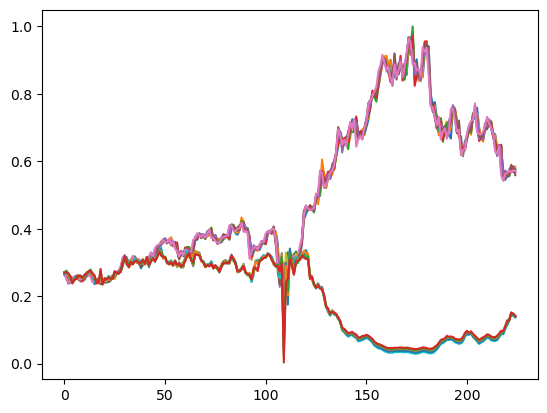

In [73]:
plt.plot(y_test)
plt.plot(output2)

In [74]:
output2.shape,y_test.shape

((225, 7), (225, 7))

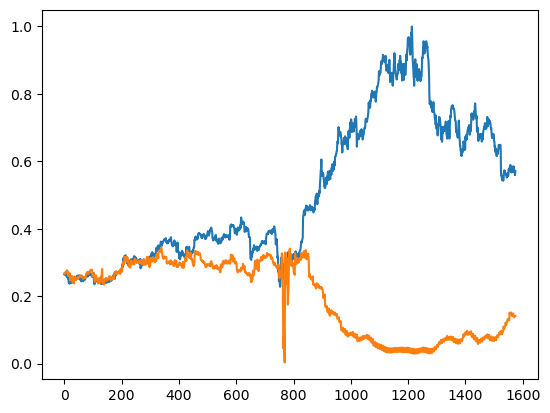

In [75]:
plt.plot(y_test.flatten())
output2=np.array(output2)
plt.plot(output2.flatten())


In [76]:
type(output2),type(y_test)

(numpy.ndarray, numpy.ndarray)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


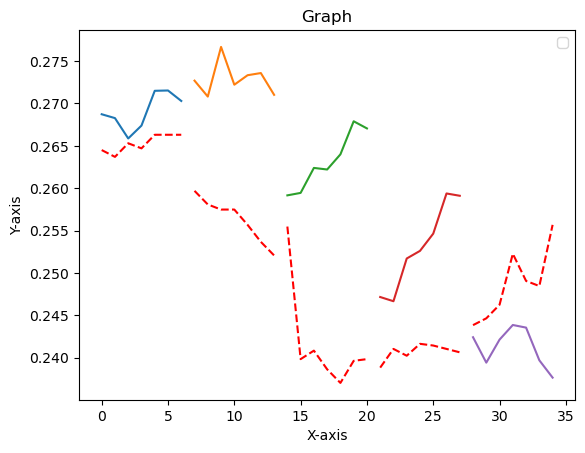

In [78]:
days=7
predict_flatten=output2.flatten()
data = predict_flatten


actual_flatten = y_test.flatten()
actual_data = actual_flatten

reshaped_data = [data[i:i+days] for i in range(0, len(data), days)]
fig, ax = plt.subplots()
for i, row in enumerate(reshaped_data[:5]): 
    x = range(i*days, (i+1)*days)
    ax.plot(x, row)  


    
reshaped_data2 = [actual_data[i:i+days] for i in range(0, len(actual_data), days)]
# Plot each row of data (actual values)
for j, col in enumerate(reshaped_data2[:5]):
    y = range(j*days, (j+1)*days)
    ax.plot(y, col, linestyle='--', color='red')
    
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Graph')
ax.legend()
plt.show()